# Vanderplas Chapter 5 (Machine Learning)

## Introducing Scikit-Learn

### Scikit-Learn's Estimator API

#### Basics of the API
1. Import
2. Instantiate
3. Arrange data
4. Fit Model
5. Apply Model
6. (Evaluate/Measure Model Perfornace)

#### Supervised Learning Example: Simple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Anaconda3\envs\project\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


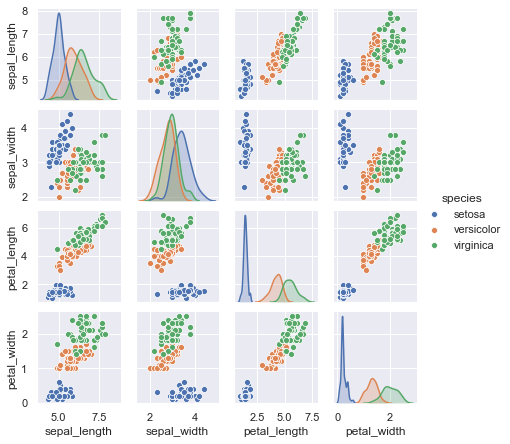

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5);

In [4]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

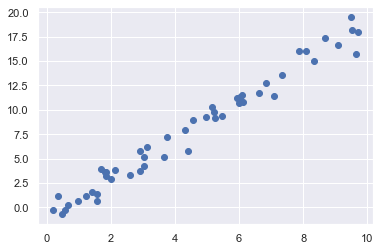

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x -1 + rng.randn(50)
plt.scatter(x,y);

In [23]:
## 1. Choose a class of model
from sklearn.linear_model import LinearRegression

In [24]:
## 2. Choose model hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [25]:
## 3. Arrange data into a features matrix and target vector

X = x[:, np.newaxis]
X.shape

(50, 1)

In [26]:
## 4. Fit the model to your data.

model.fit(X,y)

LinearRegression()

In [27]:
### Check model coefficient
model.coef_

array([1.9776566])

In [28]:
### Check model intercept
model.intercept_

-0.9033107255311164

In [29]:
## 5. Predict Labels for unknown data.
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

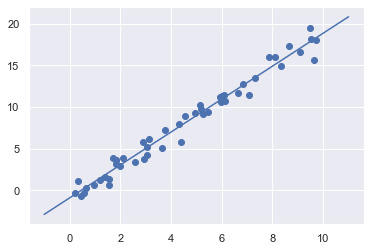

In [30]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [33]:
### 0. Split data into training and test sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [37]:
### 1. Choose Model Class
from sklearn.naive_bayes import GaussianNB
### 2. Instantiate Model
model = GaussianNB()
### 3. Fit the model to data
model.fit(Xtrain, ytrain)
### 4. Predict model on new data
y_model = model.predict(Xtest)
### 5. Apply/evaluate model
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#### Unsupervised learning example: Iris dimensionality

In [39]:
### 1. Choose model class (decomposition - PCA)
from sklearn.decomposition import PCA

### 2. Instantiate the model with hyperparameters
model = PCA(n_components=2)

### 3. Fit to data. Notice y is not specified!
model.fit(X_iris)

### 4. Apply the model to transform the data to two dimensions.
X_2D = model.transform(X_iris)

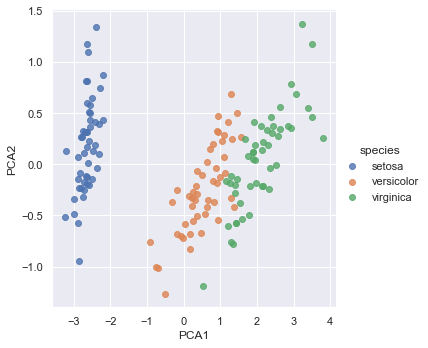

In [40]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

#### Unsupervised learning: Iris clustering

In [48]:
### 1. Choose the model class
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture
### 2. Instantiate the model with hyperparameters
model = GMM(n_components = 3, covariance_type = 'full')
### 3. Fit to data. Notice y is not specified!
model.fit(X_iris)
### 4. Determine cluster labels
y_gmm = model.predict(X_iris) 
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

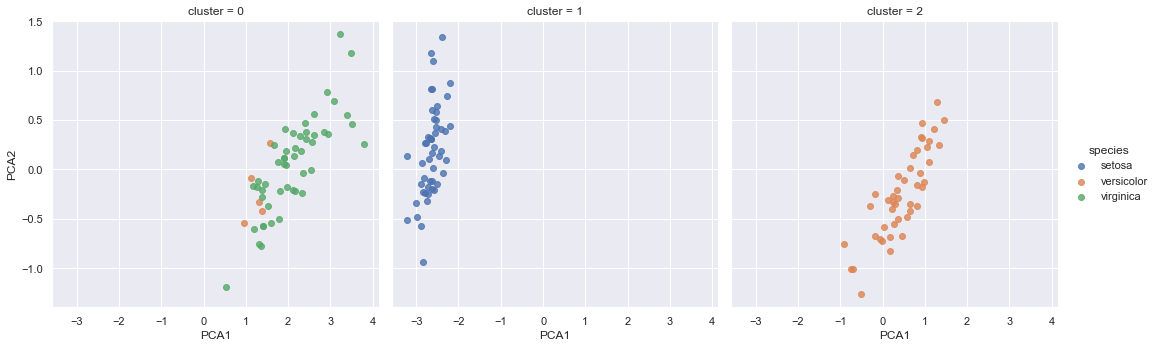

In [49]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col = 'cluster', fit_reg=False);

### Application: Exploring Handwritten digits

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

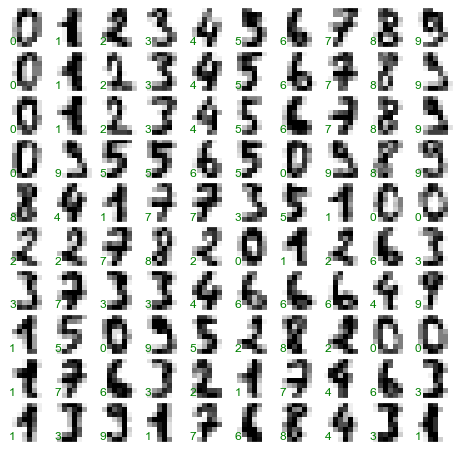

In [51]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks' :[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
                                           transform=ax.transAxes,color='green')

In [58]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = ([digits.target,np.newaxis])
y.shape

AttributeError: 'list' object has no attribute 'shape'

In [66]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

IndexError: index 2 is out of bounds for axis 0 with size 2

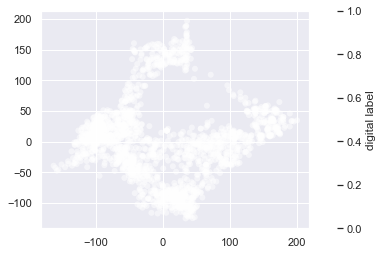

In [67]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none', alpha=.5, cmap=plt.cm.get_cmap('prism', 0))
plt.colorbar(label='digital label', ticks=range(10))
plt.clim(-0.5, 9.5); 